In [81]:
import tensorflow as tf

from pathlib2 import Path

import os
import PIL

import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [36]:
## Image settings
batch_size = 32
img_height = 200
img_width = 200

In [70]:
## Get database
## From Internet
dataset_url = "https://dl.dropboxusercontent.com/s/fz3oksq1zh7iy58/dataset.tar.gz?dl=0"
data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url, untar=True)
data_dir = Path(data_dir)

## LOCAL
#data_dir = Path('./dataset')

In [71]:
## Count images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9780


In [39]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9780 files belonging to 10 classes.
Using 7824 files for training.


In [40]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9780 files belonging to 10 classes.
Using 1956 files for validation.


In [41]:
class_names = training_dataset.class_names

In [42]:
AUTOTUNE = tf.data.AUTOTUNE

training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
normalization_layer = layers.Rescaling(1./255)

normalized_dataset = training_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

In [50]:
num_classes = len(class_names)

## Convolution and pooling
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs=20
history = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
245/245 [==============================] - 132s 536ms/step - loss: 1.6542 - accuracy: 0.4218 - val_loss: 1.3412 - val_accuracy: 0.4954
Epoch 2/20
245/245 [==============================] - 132s 538ms/step - loss: 1.2396 - accuracy: 0.5382 - val_loss: 1.2158 - val_accuracy: 0.5440
Epoch 3/20
245/245 [==============================] - 133s 544ms/step - loss: 1.0792 - accuracy: 0.5870 - val_loss: 1.1145 - val_accuracy: 0.5654
Epoch 4/20
245/245 [==============================] - 133s 543ms/step - loss: 0.9426 - accuracy: 0.6411 - val_loss: 1.1794 - val_accuracy: 0.5680
Epoch 5/20
245/245 [==============================] - 133s 543ms/step - loss: 0.8117 - accuracy: 0.6934 - val_loss: 1.1323 - val_accuracy: 0.5711
Epoch 6/20
245/245 [==============================] - 133s 544ms/step - loss: 0.6592 - accuracy: 0.7527 - val_loss: 1.2215 - val_accuracy: 0.5706
Epoch 7/20
245/245 [==============================] - 134s 546ms/step - loss: 0.4988 - accuracy: 0.8162 - val_loss: 1.4122 -

In [51]:
model.save('.')

INFO:tensorflow:Assets written to: .\assets


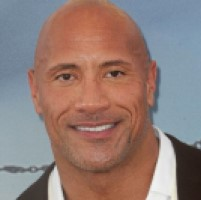

In [78]:
test_img_path = Path('./test_images')
test_img = list(test_img_path.glob('*.jpg'))
PIL.Image.open(str(test_img[2]))

In [57]:
## Testing with Dwayne Johnson
test_img_path = Path('./test_images/rock.jpg')

img = tf.keras.utils.load_img(test_img_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This person is most likely to be {} years old. {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This person is most likely to be 41-50 years old. 97.78 percent confidence.


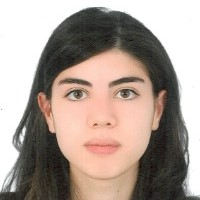

In [80]:
PIL.Image.open(str(test_img[0]))

In [58]:
## Testing with a 20 years old person.
test_img_path = Path('./test_images/imane.jpg')

img = tf.keras.utils.load_img(test_img_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This person is most likely to be {} years old. {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This person is most likely to be 11-20 years old. 99.70 percent confidence.


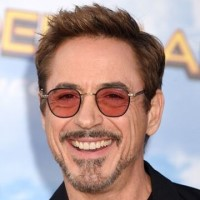

In [79]:
PIL.Image.open(str(test_img[1]))

In [72]:
## Testing with Robert Downey JR.
test_img_path = Path('./test_images/rdj.jpg')

img = tf.keras.utils.load_img(test_img_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This person is most likely to be {} years old. {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This person is most likely to be 71-80 years old. 65.92 percent confidence.
